# 10-year risk of future coronary heart disease Prediction Using Logistic Regression

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

The datasets consists of  both demographic, behavioral and medical risk predictor variables and one target variable, TenYearCHD. Predictor variables includes the number of current smoker, person taking cigarettes per day,their BMI, total cholestrol,heart rate, age, and so on.

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv("framingham.csv") # Reading the Data
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
data.dropna(how='any',inplace=True)

In [5]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

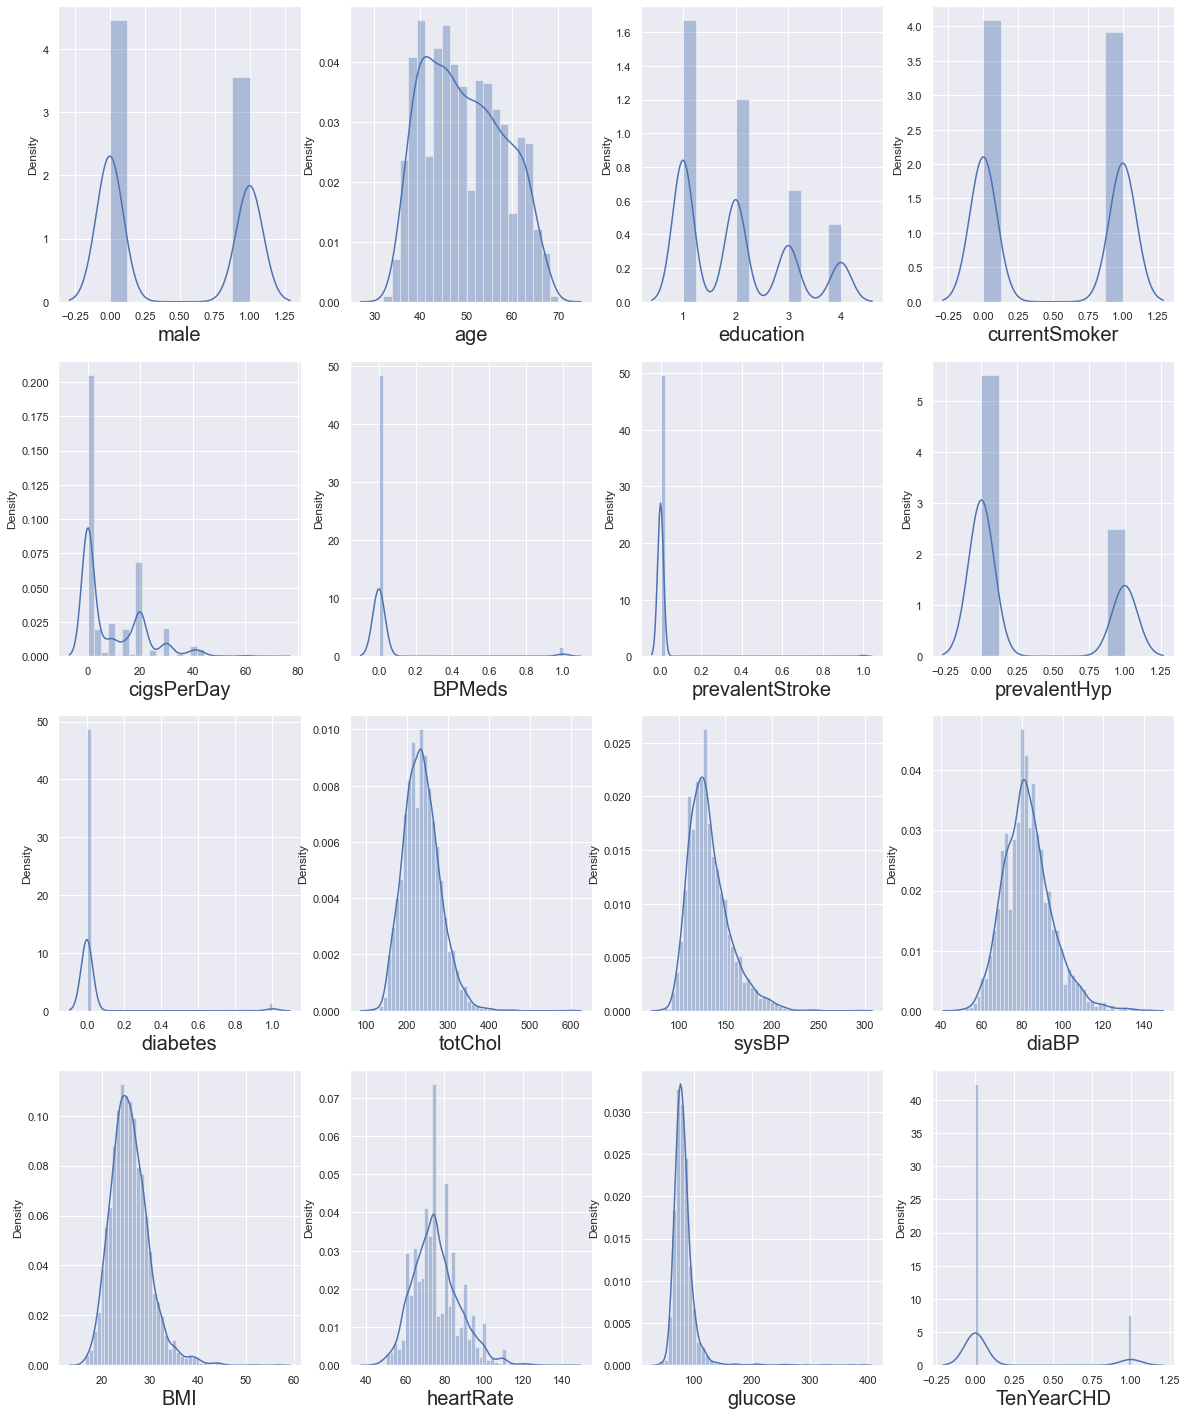

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

little skewness

In [7]:
# replacing zero values with the mean of the column
#data['BPMeds'] = data['BPMeds'].replace(0,data['BPMeds'].mean())
#data['prevalentStroke'] = data['prevalentStroke'].replace(0,data['prevalentStroke'].mean())
#data['diabetes'] = data['diabetes'].replace(0,data['diabetes'].mean())

<AxesSubplot:>

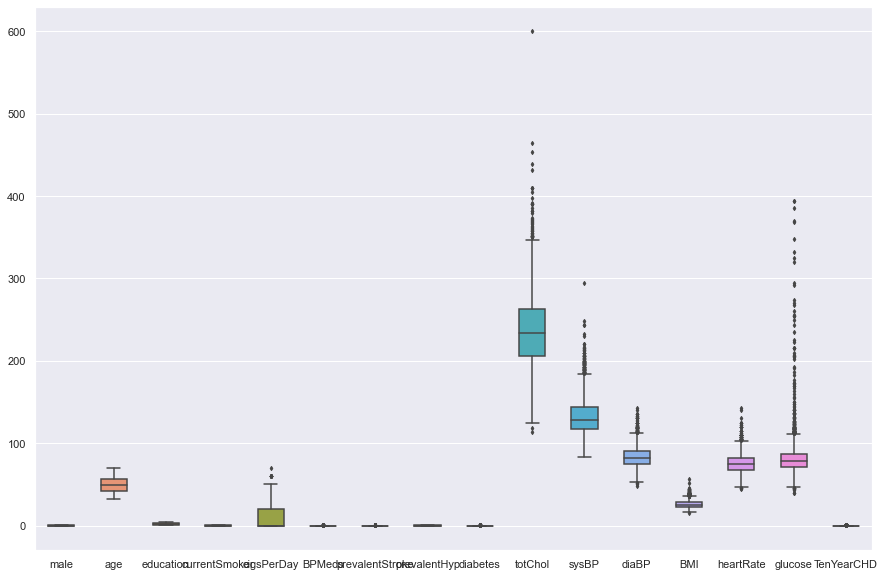

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [9]:
X = data.drop(columns = ['TenYearCHD']) #features
y = data['TenYearCHD'] #target

In [10]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [11]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


<AxesSubplot:>

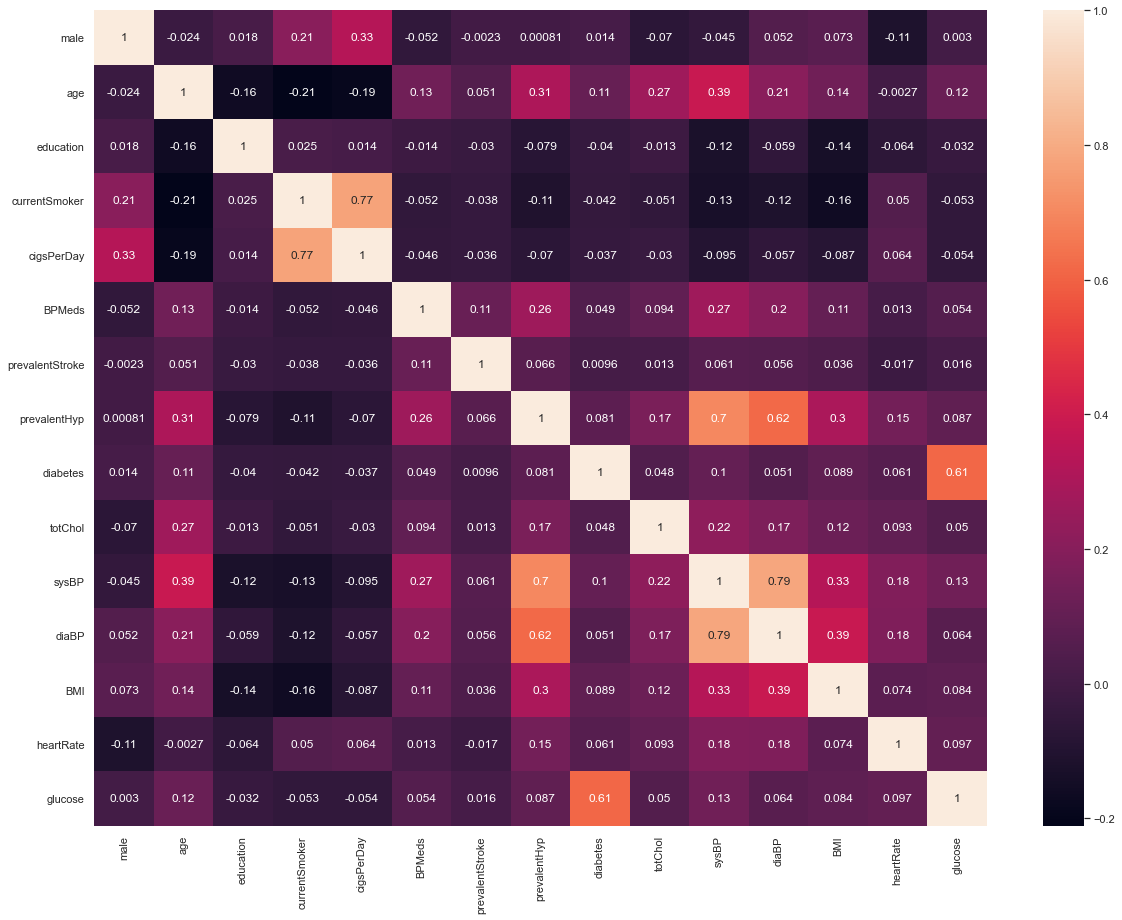

In [12]:
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(),annot=True)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355) #training & testing 

In [14]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred = log_reg.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8555798687089715

In [17]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[773,   4],
       [128,   9]], dtype=int64)

In [18]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [19]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8555798687089715

In [20]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9948519948519948

In [21]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8579356270810211

In [22]:
f1=2*((Precision * Recall )) /(Precision + Recall)

In [23]:
f1

0.9213349225268176

In [24]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [25]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5302727127544646

In [26]:
y_pred_prob = log_reg.predict_proba(x_test)

In [27]:
y_pred_prob

array([[0.94226562, 0.05773438],
       [0.93332486, 0.06667514],
       [0.94500591, 0.05499409],
       ...,
       [0.97540036, 0.02459964],
       [0.95165409, 0.04834591],
       [0.9419314 , 0.0580686 ]])

In [28]:
y_pred_prob[:,1]

array([0.05773438, 0.06667514, 0.05499409, 0.11416653, 0.11780082,
       0.0549928 , 0.14002234, 0.05732132, 0.12481661, 0.07241653,
       0.08177627, 0.52762165, 0.23992701, 0.17824401, 0.16411477,
       0.31229457, 0.15073862, 0.23373955, 0.16903254, 0.03605215,
       0.18013972, 0.07603523, 0.10088301, 0.14665511, 0.10990341,
       0.07452599, 0.30018461, 0.08306526, 0.10214624, 0.10016236,
       0.22191403, 0.34092771, 0.12533403, 0.0823542 , 0.09707006,
       0.05664133, 0.04077847, 0.1690726 , 0.11670216, 0.05814265,
       0.07624834, 0.06726566, 0.20115383, 0.07470077, 0.27949186,
       0.06143977, 0.38979144, 0.04497896, 0.11539976, 0.04462194,
       0.20265831, 0.13160815, 0.23684767, 0.0913278 , 0.13304163,
       0.44743942, 0.17638081, 0.27083074, 0.19145019, 0.19805022,
       0.08315971, 0.05510873, 0.24843468, 0.18321124, 0.07633016,
       0.21122606, 0.06474593, 0.09777815, 0.09527008, 0.16059497,
       0.07306079, 0.25444521, 0.02296938, 0.26961687, 0.09785

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

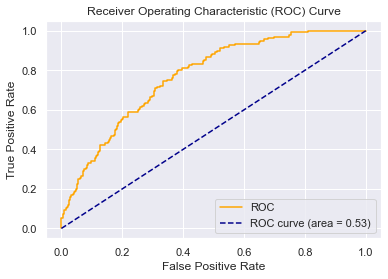

In [30]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()